# Project: Calculation of the Implicit Volatility

Group 33 Participants:

- Ayse Beyza Nirun (240114)
- Muhammad Saad Malik (244962)



In this project, our primary objective is to analyze the time series data of the Apple Index and determine if it follows a Geometric Brownian Motion (gBM) pattern. We will achieve this by performing various statistical tests and comparing the results with the properties of a gBM model. Additionally, in the second part of the project, we will calculate the implied volatility of the underlying asset.

To start the analysis, we will retrieve the historical data of the Apple Index for different time periods, such as 1 year, 3 years, and 5 years, from Yahoo Finance. By examining these time series data, our goal is to identify if is there any patterns or trends.

Next, we will transform the data into logarithmic returns to study the relative changes in prices and assess their statistical properties. We will calculate summary statistics such as mean, standard deviation, and variances to estimate key parameters necessary for our analysis.

To evaluate the stationarity of the logarithmic returns, we will employ the Augmented Dickey-Fuller (ADF) test. By testing for stationarity, we can determine if the data exhibits consistent statistical properties over time.

Furthermore, we will investigate the autocorrelation structure of the data using the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots. These plots allow us to explore the correlation between observations at different time lags, helping us understand the persistence and potential forecasting power of the Apple Index.

To validate our analysis, we will compare the results of the statistical tests and autocorrelation analysis with the expected properties of a gBM model. Geometric Brownian Motion is a widely used mathematical model for simulating the random movement of financial assets. By assessing the goodness-of-fit between the Apple Index data and the gBM model, we can gain insights into the nature of price dynamics.

In the second part of the project, we will focus on calculating the implied volatility of the underlying asset. Implied volatility is a crucial parameter in options pricing and risk management. By estimating the volatility implied by options prices, we can gauge market participants' expectations of future price movements and evaluate the level of uncertainty in the market.

Throughout our analysis, we will discuss the limitations and assumptions associated with the techniques used. By the end of the project, we aim to provide a comprehensive understanding of the Apple Index's behavior and its adherence to a gBM model, along with insights into the implied volatility of the underlying asset. For this purpose we will pick 20 stock options from the Money Call Options of Apple. We will retrive the data from Bloomberg.




## Underlying Asset : APPLE Inc. (AAPL)

In [ ]:
# Import necessary libraries and modules

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import norm
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller

import scipy.stats as si
import scipy.optimize as opt
import math

import statsmodels.api as sm

In [ ]:
# Importing historical data of years 2022-2023, 2020-2023, 2018-2023 for the S&P 500 INDEX (^SPX)

aapl_data=yf.download("AAPL", start="2022-06-19", end="2023-06-19")
aapl_data1=yf.download("AAPL", start="2020-06-19", end="2023-06-19")
aapl_data2=yf.download("AAPL", start="2018-06-19", end="2023-06-19")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# View the first 5 rows using the head() function

aapl_data.head(5)
print(aapl_data.index)

DatetimeIndex(['2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-05',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)


In [ ]:
aapl_data1.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-19,88.660004,89.139999,86.287498,87.430000,85.838913,264476000
2020-06-22,87.834999,89.864998,87.787498,89.717499,88.084793,135445200
2020-06-23,91.000000,93.095001,90.567497,91.632500,89.964943,212155600
2020-06-24,91.250000,92.197502,89.629997,90.014999,88.376884,192623200
2020-06-25,90.175003,91.250000,89.392502,91.209999,89.550140,137522400


In [ ]:
aapl_data2.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-19,46.285000,46.582500,45.862499,46.422501,44.364845,134314000
2018-06-20,46.587502,46.799999,46.432499,46.625000,44.558357,82514800
2018-06-21,46.812500,47.087502,46.235001,46.365002,44.309887,102847600
2018-06-22,46.529999,46.537498,46.174999,46.230000,44.180878,108801600
2018-06-25,45.849998,46.230000,45.182499,45.542500,43.523849,126652400


In [ ]:
# Drop rows with null values with dropna() function

aapl_data=pd.DataFrame(aapl_data['Adj Close']).dropna()
print(aapl_data)

             Adj Close
Date                  
2022-06-21  135.063492
2022-06-22  134.546600
2022-06-23  137.449265
2022-06-24  140.819153
2022-06-27  140.819153
...                ...
2023-06-12  183.789993
2023-06-13  183.309998
2023-06-14  183.949997
2023-06-15  186.009995
2023-06-16  184.919998

[250 rows x 1 columns]


In [ ]:
aapl_data1=pd.DataFrame(aapl_data1['Adj Close']).dropna()
print(aapl_data1)

             Adj Close
Date                  
2020-06-19   85.838913
2020-06-22   88.084793
2020-06-23   89.964943
2020-06-24   88.376884
2020-06-25   89.550140
...                ...
2023-06-12  183.789993
2023-06-13  183.309998
2023-06-14  183.949997
2023-06-15  186.009995
2023-06-16  184.919998

[754 rows x 1 columns]


In [ ]:
aapl_data2=pd.DataFrame(aapl_data2['Adj Close']).dropna()
print(aapl_data2)

             Adj Close
Date                  
2018-06-19   44.364845
2018-06-20   44.558357
2018-06-21   44.309887
2018-06-22   44.180878
2018-06-25   43.523849
...                ...
2023-06-12  183.789993
2023-06-13  183.309998
2023-06-14  183.949997
2023-06-15  186.009995
2023-06-16  184.919998

[1258 rows x 1 columns]


## Time Series Analysis of the Underlying Asset

### Plotting the Price Data for Time Series

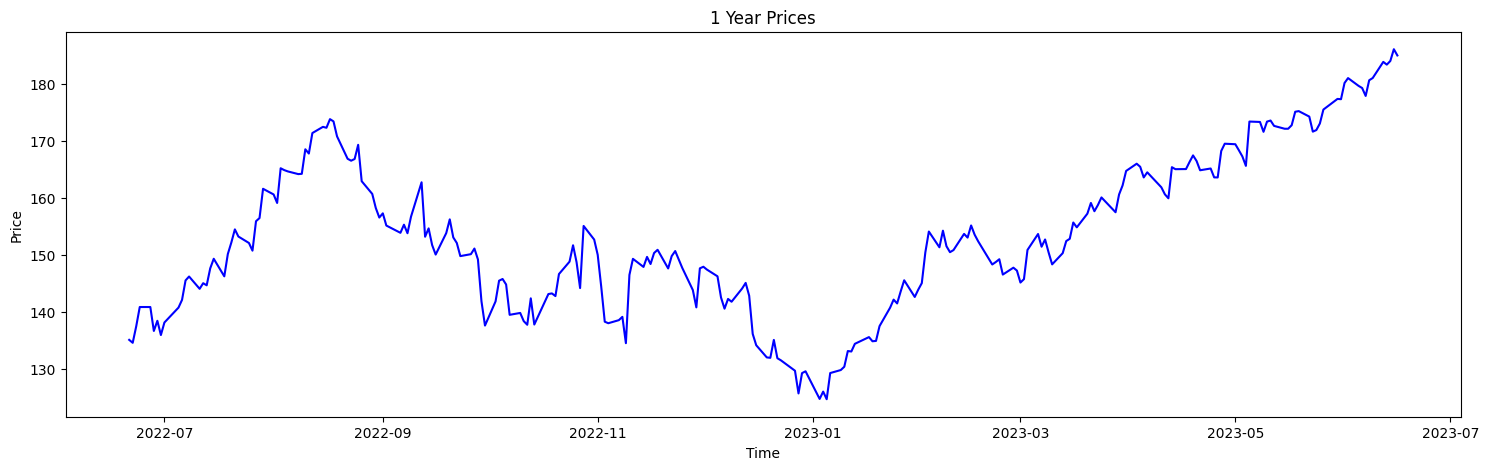

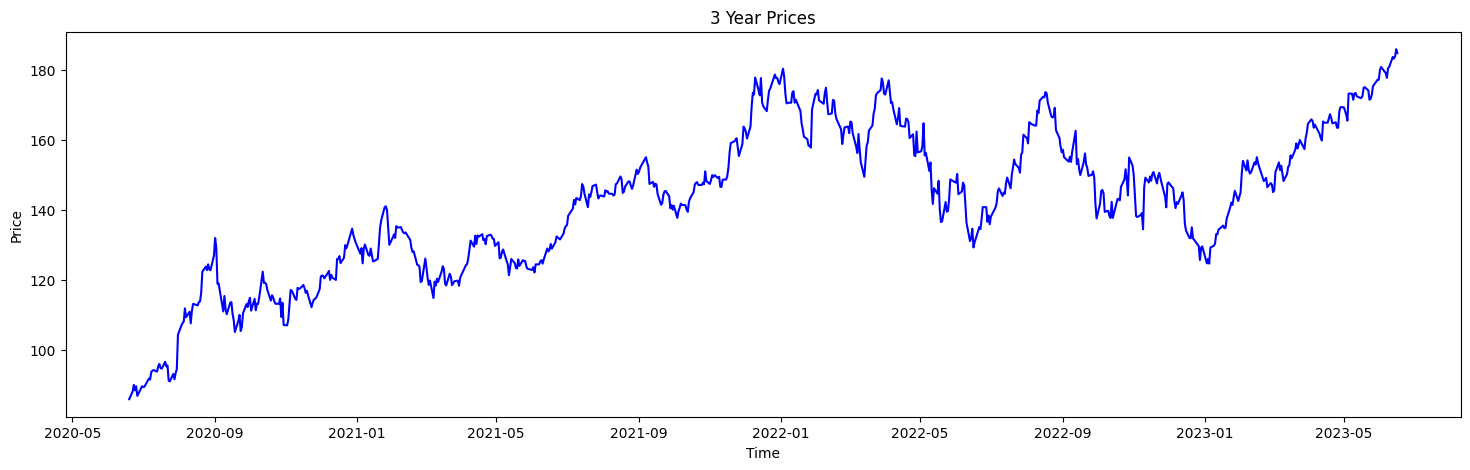

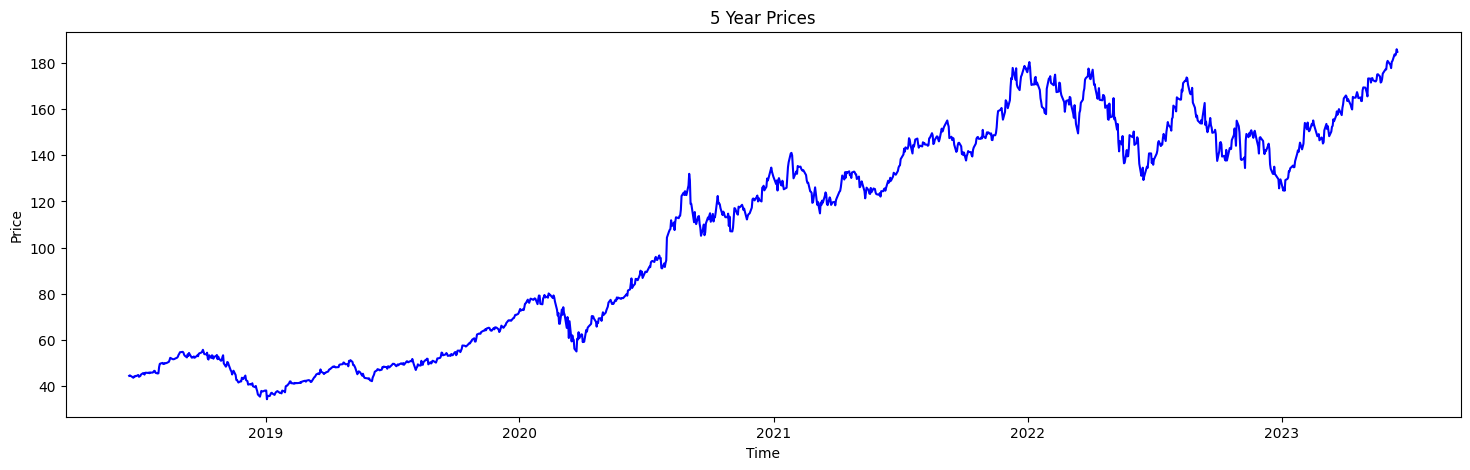

In [ ]:
#Plot 1 Year Prices
plt.figure(figsize = (18,5))
plt.plot(aapl_data['Adj Close'], color = 'b' )
plt.title('1 Year Prices')
plt.ylabel('Price')
plt.xlabel('Time')

#Plot 3 Year Prices
plt.figure(figsize = (18,5))
plt.plot(aapl_data1['Adj Close'], color = 'b')
plt.title('3 Year Prices')
plt.ylabel('Price')
plt.xlabel('Time')

#Plot 5 Year Prices
plt.figure(figsize = (18,5))
plt.plot(aapl_data2['Adj Close'], color = 'b')
plt.title('5 Year Prices')
plt.ylabel('Price')
plt.xlabel('Time')

plt.show()

### Calculating the Logarithmic Returns

In [ ]:
#Calculate the Logarithmic Returns of the Adjusted Closing Prices

aapl_data['Log_returns'] = np.log(aapl_data['Adj Close'] / aapl_data['Adj Close'].shift(1))
aapl_data['Log_returns'].dropna()

Date
2022-06-22   -0.003834
2022-06-23    0.021344
2022-06-24    0.024222
2022-06-27    0.000000
2022-06-28   -0.030242
                ...   
2023-06-12    0.015518
2023-06-13   -0.002615
2023-06-14    0.003485
2023-06-15    0.011136
2023-06-16   -0.005877
Name: Log_returns, Length: 249, dtype: float64

In [ ]:
#Calculate the Logarithmic Returns of the Adjusted Closing Prices

aapl_data1['Log_returns'] = np.log(aapl_data1['Adj Close'] / aapl_data1['Adj Close'].shift(1))
aapl_data1['Log_returns'].dropna()

Date
2020-06-22    0.025827
2020-06-23    0.021120
2020-06-24   -0.017810
2020-06-25    0.013188
2020-06-26   -0.031208
                ...   
2023-06-12    0.015518
2023-06-13   -0.002615
2023-06-14    0.003485
2023-06-15    0.011136
2023-06-16   -0.005877
Name: Log_returns, Length: 753, dtype: float64

In [ ]:
#Calculate the Logarithmic Returns of the Adjusted Closing Prices

aapl_data2['Log_returns'] = np.log(aapl_data2['Adj Close'] / aapl_data2['Adj Close'].shift(1))
aapl_data2['Log_returns'].dropna()

Date
2018-06-20    0.004352
2018-06-21   -0.005592
2018-06-22   -0.002916
2018-06-25   -0.014983
2018-06-26    0.012329
                ...   
2023-06-12    0.015518
2023-06-13   -0.002615
2023-06-14    0.003485
2023-06-15    0.011136
2023-06-16   -0.005877
Name: Log_returns, Length: 1257, dtype: float64

In [ ]:
#Calculate the Daily Mean of Logarithmic Returns

daily_mean = aapl_data['Log_returns'].mean()
daily_mean1 = aapl_data1['Log_returns'].mean()
daily_mean2 = aapl_data2['Log_returns'].mean()

#Calculate the Annual Mean of Logarithmic Returns

annual_mean = daily_mean * 249
annual_mean1 = daily_mean1 * 249
annual_mean2 = daily_mean2 * 249

In [ ]:
#Calculate the Daily Standard Deviation of Logarithmic Returns

daily_std = aapl_data['Log_returns'].std()
daily_std1 = aapl_data1['Log_returns'].std()
daily_std2 = aapl_data2['Log_returns'].std()

#Calculate the Annual Standard Deviation of Logarithmic Returns
annual_std = daily_std*np.sqrt(249)
annual_std1 = daily_std1*np.sqrt(249)
annual_std2 = daily_std2*np.sqrt(249)

In [ ]:
#Calculate the Daily Variance of Logarithmic Returns

daily_variance = np.var(aapl_data['Log_returns'])
daily_variance1 = np.var(aapl_data1['Log_returns'])
daily_variance2 = np.var(aapl_data2['Log_returns'])

#Calculate the Annual Variance of Logarithmic Returns

annual_variance = daily_variance * 249
annual_variance1 = daily_variance1 * 249
annual_variance2 = daily_variance2 * 249

### Plotting  and Showing the Normal Distribution Curve of the Histograms of the Logarithmic Returns

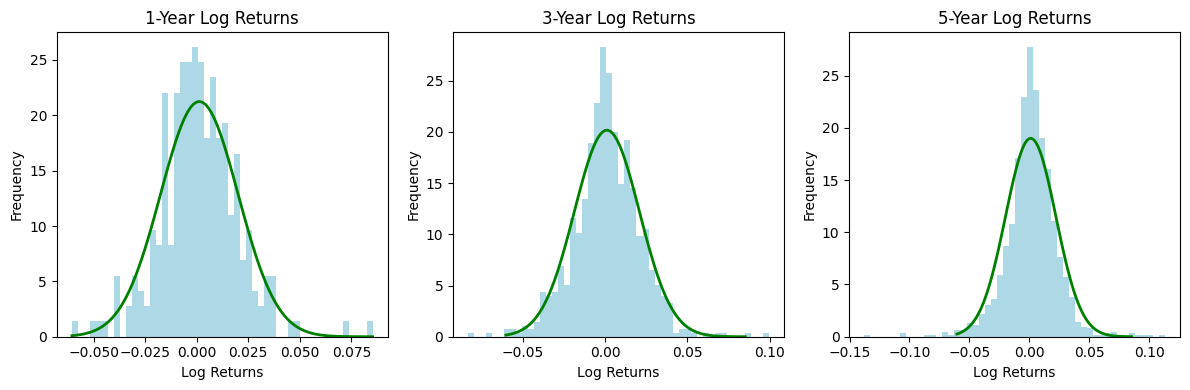

In [ ]:
#Plot the Histograms of the Logarithmic Returns

from scipy.stats import norm

binN = 50

plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.subplot(1, 3, 1)
plt.hist(aapl_data['Log_returns'], bins = binN, density = True, color = 'lightblue')
plt.title("1-Year Log Returns")
plt.xlabel("Log Returns")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(aapl_data1['Log_returns'], bins = binN, density = True, color = 'lightblue')
plt.title("3-Year Log Returns")
plt.xlabel("Log Returns")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(aapl_data2['Log_returns'], bins = binN, density = True, color = 'lightblue')
plt.title("5-Year Log Returns")
plt.xlabel("Log Returns")
plt.ylabel("Frequency")

#Overlay the Normal Distribution Curve on Each Histogram

x = np.linspace(aapl_data['Log_returns'].min(), aapl_data['Log_returns'].max(), 100)
plt.subplot(1, 3, 1)
plt.plot(x, norm.pdf(x, daily_mean, daily_std), 'green', linewidth = 2)
plt.subplot(1, 3, 2)
plt.plot(x, norm.pdf(x, daily_mean1, daily_std1), 'green', linewidth = 2)
plt.subplot(1, 3, 3)
plt.plot(x, norm.pdf(x, daily_mean2, daily_std2), 'green', linewidth = 2)

plt.tight_layout()
plt.show()

To determine if our histograms follows a normal distribution, we can visually compare their shape of the histogram to the shape of a corresponding normal distribution curve overlaid on it, which is the green line in our case. The histogram that closely resembles the shape of the curve is likely to be normally distributed.

As we can see from the shape of the curve our time series analysis for 3 different periods may be normally distributed. However, it's important to note that visual inspection alone does not provide a definitive test for normality. To conduct a more rigorous analysis,the Shapiro-Wilk test will be used. These test provides quantitative measure of normality and can determine if the observed data significantly deviates from a normal distribution.

### Shaprio-Wilk Test to Check If the Logarithmic Returns Follow a Normal Distribution

In [ ]:
# Perform Shapiro-Wilk Test

from scipy.stats import shapiro

statistic, p_value = shapiro(aapl_data['Log_returns'])

alpha = 0.05
if p_value > alpha:
    print("Data follows a normal distribution (fail to reject H0)")
else:
    print("Data does not follow a normal distribution (reject H0)")

statistic, p_value = shapiro(aapl_data1['Log_returns'])
alpha = 0.05
if p_value > alpha:
    print("Data1 follows a normal distribution (fail to reject H0)")
else:
    print("Data1 does not follow a normal distribution (reject H0)")

statistic, p_value = shapiro(aapl_data2['Log_returns'])
alpha = 0.05
if p_value > alpha:
    print("Data2 follows a normal distribution (fail to reject H0)")
else:
    print("Data2 does not follow a normal distribution (reject H0)")


Data follows a normal distribution (fail to reject H0)
Data1 follows a normal distribution (fail to reject H0)
Data2 follows a normal distribution (fail to reject H0)


We have performed Shapiro-Wilk Test on each logarithmic return dataset to result the statistic and p-value variables. We set our significance level, alpha, as 0.05.

The code printed the corresponding results for each datasets, then we checked if the p-value is greater than the significance level (p_value > alpha).

If the condition is true, it means that the data follows a normal distribution (fail to reject the null hypothesis, H0). Otherwise, it indicates that the data does not follow a normal distribution (reject H0).

In our case the results indicate that each dataset follow a normal distribution (fail to reject the null hypothesis, H0).



### Augmented Dickey-Fuller (ADF) Test to Check for Stationarity in the Logarithmic Returns

In [ ]:
from statsmodels.tsa.stattools import adfuller

data_clean=aapl_data['Log_returns'].dropna()
data1_clean=aapl_data1['Log_returns'].dropna()
data2_clean=aapl_data2['Log_returns'].dropna()

# Perform ADF test for aapl_data

result_data = adfuller(data_clean)
adf_stat_data = result_data[0]
p_value_data = result_data[1]
print(f"ADF Statistic - Data: {adf_stat_data}")
print(f"P-value - Data: {p_value_data}")
if p_value_data < 0.05:
    print("The data is stationary (reject H0)")
else:
    print("The data is non-stationary (fail to reject H0)")

# Perform ADF test for aapl_data1

result_data1 = adfuller(data1_clean)
adf_stat_data1 = result_data1[0]
p_value_data1 = result_data1[1]
print(f"ADF Statistic - Data1: {adf_stat_data1}")
print(f"P-value - Data1: {p_value_data1}")
if p_value_data1 < 0.05:
    print("Data1 is stationary (reject H0)")
else:
    print("Data1 is non-stationary (fail to reject H0)")

# Perform ADF test for aapl_data2

result_data2 = adfuller(data2_clean)
adf_stat_data2 = result_data2[0]
p_value_data2 = result_data2[1]
print(f"ADF Statistic - Data2: {adf_stat_data2}")
print(f"P-value - Data2: {p_value_data2}")
if p_value_data2 < 0.05:
    print("Data2 is stationary (reject H0)")
else:
    print("Data2 is non-stationary (fail to reject H0)")

ADF Statistic - Data: -7.124517336404548
P-value - Data: 3.6494889956704594e-10
The data is stationary (reject H0)
ADF Statistic - Data1: -28.45677448756
P-value - Data1: 0.0
Data1 is stationary (reject H0)
ADF Statistic - Data2: -10.799829238735654
P-value - Data2: 2.0311295712251497e-19
Data2 is stationary (reject H0)


### Plotting the Autocorrelation and Partial Autocorrelation Functions for the Logarithmic Returns

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


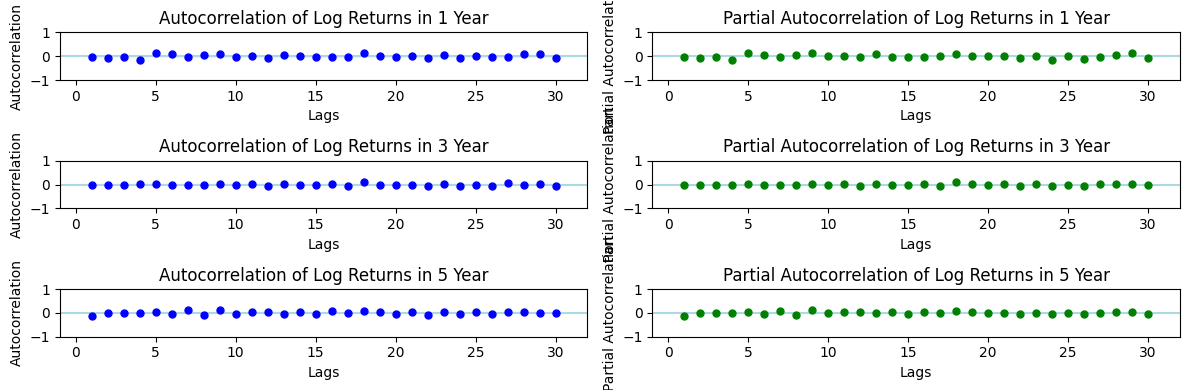

In [ ]:
# Perform Autocorrelation Function

fig, axes = plt.subplots(3, 2, figsize= (12, 4))

plot_acf(aapl_data['Log_returns'].dropna(), lags= 30, zero= False, ax= axes[0,0], color= 'blue', alpha= 0.5)
axes[0,0].set_xlabel('Lags')
axes[0,0].set_ylabel('Autocorrelation')
axes[0,0].set_title('Autocorrelation of Log Returns in 1 Year')
axes[0,0].lines[0].set_color('lightblue')


plot_acf(aapl_data1['Log_returns'].dropna(), lags= 30, zero= False, ax= axes[1,0], color= 'blue', alpha= 0.5)
axes[1,0].set_xlabel('Lags')
axes[1,0].set_ylabel('Autocorrelation')
axes[1,0].set_title('Autocorrelation of Log Returns in 3 Year')
axes[1,0].lines[0].set_color('lightblue')

plot_acf(aapl_data2['Log_returns'].dropna(), lags= 30, zero= False, ax= axes[2,0], color= 'blue', alpha= 0.5)
axes[2,0].set_xlabel('Lags')
axes[2,0].set_ylabel('Autocorrelation')
axes[2,0].set_title('Autocorrelation of Log Returns in 5 Year')
axes[2,0].lines[0].set_color('lightblue')


# Perform Partial Autocorrelation Function

plot_pacf(aapl_data['Log_returns'].dropna(), lags= 30, zero= False, ax= axes[0,1], color= 'green', alpha= 0.5)
axes[0,1].set_xlabel('Lags')
axes[0,1].set_ylabel('Partial Autocorrelation')
axes[0,1].set_title('Partial Autocorrelation of Log Returns in 1 Year')
axes[0,1].lines[0].set_color('lightblue')

plot_pacf(aapl_data1['Log_returns'].dropna(), lags= 30, zero= False, ax= axes[1,1], color= 'green', alpha= 0.5)
axes[1,1].set_xlabel('Lags')
axes[1,1].set_ylabel('Partial Autocorrelation')
axes[1,1].set_title('Partial Autocorrelation of Log Returns in 3 Year')
axes[1,1].lines[0].set_color('lightblue')

plot_pacf(aapl_data2['Log_returns'].dropna(), lags= 30, zero= False, ax= axes[2,1], color= 'green', alpha= 0.5)
axes[2,1].set_xlabel('Lags')
axes[2,1].set_ylabel('Partial Autocorrelation')
axes[2,1].set_title('Partial Autocorrelation of Log Returns in 5 Year')
axes[2,1].lines[0].set_color('lightblue')

plt.tight_layout()
plt.show()

Finally, based on extensive analysis of the underlying time series data, we compared our results with the properties of Geometric Brownian Motion (gBM). Here are the key results:

Normal Distribution: We found that the logarithmic returns of the Apple Index (AAPL) follow a normal distribution, which is conforming to the gBM property that logarithmic returns follow a normal distribution.

Autocorrelation Analysis: The autocorrelation and partial autocorrelation functions indicated that there is no significant correlation between observations at our  time lags. This is consistent with the incremental independence property of the gBM, where Apple Index (AAPL) future price movements are assumed to be independent of past movements.

Stationarity Test: The Augmented Dickey-Fuller (ADF) test demonstrated that the logarithmic returns of the Apple Index (AAPL) are stationarity. This confirms the time homogeneity property of the gBM, where the statistical properties of the asset remain constant over time.

By comparing our analysis results with the properties of the gBM, we find strong evidence that the underlying time series data follow a gBM model. The normal distribution of logarithmic returns, the absence of significant autocorrelation and the presence of stationarity are compatible with the key features of the gBM.


## Calculating the Implicit Volatility

The following function interpolates the implied volatiliy using the the Newton-Raphson method. The example used below is from the book, Options, Futures and other Derivatives, by John C. Hull to test the function (Page 318). It provides the correct result which reassures the correctness of the function.

In [ ]:
import numpy as np
import scipy.stats as si
import scipy.optimize as opt
import math

# Function to calculate the Black-Scholes option price

def black_scholes_call(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    return call_price

# Function to calculate the difference between observed and model price

def difference(sigma, S, K, T, r, observed_price):
    model_price = black_scholes_call(S, K, T, r, sigma)
    return model_price - observed_price

# Function to calculate implied volatility

def calculate_implied_volatility(S, K, T, r, observed_price):
    implied_volatility = opt.newton(difference, x0=0.5, args=(S, K, T, r, observed_price))
    return implied_volatility

# Set the parameters for the option

S = 21  # Current stock price (replace with actual data)
K = 20 # Strike price of the option (replace with actual data)
T = 0.25  # Time to expiration in years (replace with actual data)
r = 0.1  # Risk-free interest rate (LIBOR or equivalent for the corresponding period, replace with actual data)

observed_price = 1.875  # Observed market price of the option (replace with actual data)

# Calculate implied volatility

implied_volatility = calculate_implied_volatility(S, K, T, r, observed_price)

# Print the result

print("Implied Volatility: {:.2%}".format(implied_volatility))

Implied Volatility: 23.45%


##Apple Stock Options

We have picked randomly picked 20 stock options for the Call Options of Apple. The same method used in the last block is utlilized to interpolate the implied volatility. We have used the 10 Year Treasury Inflation Protected Securities rate (TIPS), as per July 11th 2023, as the risk-free interest rate, which was 1.72%. Data was retrieved from [Bloomberg](https://www.bloomberg.com/markets/rates-bonds/government-bonds/us). TIPS is an appropriate proxy for the long term inflation rate that protects securites against expected inflation. Hence, we found it to be an appropriate proxy for this project.

It is worth noting that the following code should be run during the trading hours when there is price movement. This is due to no movements in the stock prices resulting in a very small implied volatility (usually 0.001%). Information in this [link](https://viewpoint.pwc.com/dt/us/en/pwc/accounting_guides/stockbased_compensat/stockbased_compensat__3_US/chapter_8_estimating_US/84_the_blackscholes__US.html#:~:text=In%20the%20Black%2DScholes%20model,number%20very%20close%20to%20zero.) explains why this is the case.

As we run the code during the trading hours, we noticed the mean absolute error of our implied volatiliy calculation and the original volatility to be non-zero. Considering the assumptions of the Black-Scholes Model and its usage to price European options, a non-zero mean absolute error can be possible. Furthermore, the risk-free interest rate used may not align with that used in the real calculation. Lastly, we assumed a our time to expiration to be number of days until expiration divided by the number of days in a year. Simplifying the time to expiration without the consideration of the 'trading days' involved may also be a reason for mean absolute error to be non-zero.




In [ ]:
import math
import yfinance as yf
from scipy import optimize
from datetime import date, datetime
import numpy as np
import scipy.stats as si
import scipy.optimize as opt
import math

# Define the option details

symbol = "AAPL"  # Ticker symbol for S&P 500 index
expiration = "2023-09-15"  # Expiration date of the option
option_type = "call"  # Option type (call or put)
num_options = 40  # Number of options to consider

aapl = yf.download(symbol, start="2022-06-19", end="2023-07-11")
aapl.index = aapl.index.date

# Fetch the option chain using yfinance

spx_options = yf.Ticker(symbol)
options_chain = spx_options.option_chain(expiration)


# Extract the call options data

call_options = options_chain.calls[20:num_options]


# Function to calculate the Black-Scholes option price

def black_scholes_call(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    return call_price

# Function to calculate the difference between observed and model price

def difference(sigma, S, K, T, r, observed_price):
    model_price = black_scholes_call(S, K, T, r, sigma)
    return model_price - observed_price

# Function to calculate implied volatility

def calculate_implied_volatility(S, K, T, r, observed_price):
    implied_volatility = opt.newton(difference, x0=0.5, args=(S, K, T, r, observed_price))
    return implied_volatility

# Iterate over the call options and calculate implied volatility

print('-------------')
mae = []
iv = []
for _, option in call_options.iterrows():
    risk_free_rate = 0.0174 #10 year TIPS as per 11.07.2023
    strike_price = option['strike']
    option_price = option['lastPrice'] #was previously lastPrice
    ask_price = option['ask']
    original_iv = option['impliedVolatility']
    trade_date = str(option['lastTradeDate']).split(' ')[0]
    days_to_exp = datetime.strptime(expiration, '%Y-%m-%d') - datetime.strptime(trade_date, '%Y-%m-%d')
    ticker = yf.Ticker(symbol)
    todays_data = ticker.history(period='1d')
    #stock_price = 188 # Apple Stock
    stock_price = todays_data['Close'][0]
    days_left = days_to_exp.days
    print('Days to expriation: ', days_left, '  Current Stock Price: ', stock_price, '  Strike Price: ', strike_price, '  Option Price: ', option_price, '  Orignal Implied Volatility: ', str(original_iv*100))

    # Calculate implied volatility

    iv.append(original_iv)

    try:
      implied_volatility = calculate_implied_volatility(stock_price, strike_price, days_to_exp.days/365, risk_free_rate, option_price)
      print("Calculated Implied Volatility: {:.2%}".format(implied_volatility))
      mae.append(abs(original_iv - implied_volatility)*100)
      if original_iv < 0.002:
        print("Warning: We are currently in non-trading hours and the implied volatility may be close to 0 as there is no price movement. Trading hours are 0930 to 1600 EST (GMT -0400)")
    except:
      print('Failed to Converge')


    print('--------------------------------')

print('Mean Absolute Error', sum(mae)/len(mae),'%')



[*********************100%***********************]  1 of 1 completed
-------------
Days to expriation:  64   Current Stock Price:  191.00999450683594   Strike Price:  165.0   Option Price:  27.77   Orignal Implied Volatility:  33.42351733398438
Calculated Implied Volatility: 29.88%
--------------------------------
Days to expriation:  64   Current Stock Price:  191.00999450683594   Strike Price:  170.0   Option Price:  23.15   Orignal Implied Volatility:  30.170376037597656
Calculated Implied Volatility: 27.62%
--------------------------------
Days to expriation:  64   Current Stock Price:  191.00999450683594   Strike Price:  175.0   Option Price:  18.59   Orignal Implied Volatility:  28.479719116210934
Calculated Implied Volatility: 25.02%
--------------------------------
Days to expriation:  64   Current Stock Price:  191.00999450683594   Strike Price:  180.0   Option Price:  14.77   Orignal Implied Volatility:  26.068854553222653
Calculated Implied Volatility: 24.71%
---------------

##Conclusion

The file, SampleResults.txt, shows the sample results for 13 July 2023. The Mean Absolute Error was as low as 0.90%. This was a remarkable result considering the assumptions of the black scholes model and our fixed risk free interest rate. The Newton-Raphson method is a common root finding method for such problems where interpolation is required. The Newton-Raphson method has the risks of leading to a divergent series if the initial value of the implied volatiltiy is too far from its real value. Hence, the Newton-Raphson method can at times not converge and lead to a divergent series.